In [2]:
%load_ext autoreload
%autoreload 2
from analysis_lib import *

## Reanalysis of Runtimes with no Cache

In [3]:
df_single = pd.read_csv("./variable_k/runtimes/runtimes_single_bin.tsv", sep="\t", header=None)
df_k3 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k3.tsv", sep="\t", header=None)
df_k4 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k4.tsv", sep="\t", header=None)
df_k5 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k5.tsv", sep="\t", header=None)
df_k6 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k6.tsv", sep="\t", header=None)

In [4]:
dfs = [df_k3, df_k4, df_k5,df_k6]
for df in dfs:
    df.columns = ["Preprocessing","Construction","Traversal","Scanning","Complexity","Index Queries"]

In [5]:
df_single.columns = ["tmp"]
df_single["Preprocessing"] = 0
df_single["Construction"] = 0
df_single["Traversal"] = 0
df_single["Scanning"] = df_single["tmp"]
df_single["Complexity"] = 0
df_single["Index Queries"] = 0
df_single = df_single.drop(columns=["tmp"], axis=1)

In [6]:
runtime_df = pd.DataFrame([df_single.mean(),df_k3.mean(),df_k4.mean(),df_k5.mean(),df_k6.mean()])

In [7]:
runtime_df["ksize"] = pd.Series(["No Index", 3,4,5,6])

Text(0, 0.5, 'Runtime (s)')

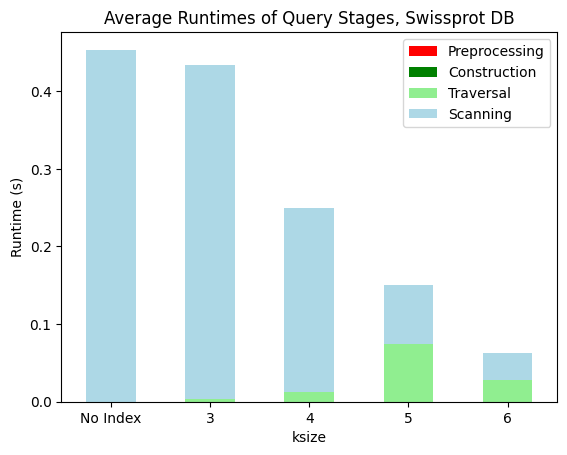

In [8]:
colors = ['red','green', 'lightgreen', 'lightblue']
plt = runtime_df.plot(kind='bar', stacked=True, x="ksize", y=["Preprocessing","Construction","Traversal","Scanning"], rot=0, color=colors, title="Average Runtimes of Query Stages, Swissprot DB")
plt.set_ylabel("Runtime (s)")

In [9]:
df_k3["ksize"] = 3
df_k4["ksize"] = 4
df_k5["ksize"] = 5
df_k6["ksize"] = 6

In [10]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=["Preprocessing","Construction","Traversal","Scanning","Complexity","Index Queries","ksize"], how='outer'), dfs)

## Linearity Analysis of Kmer Complexity to Traversal Time

Text(500, 0.08, '$R^2$ = 0.982')

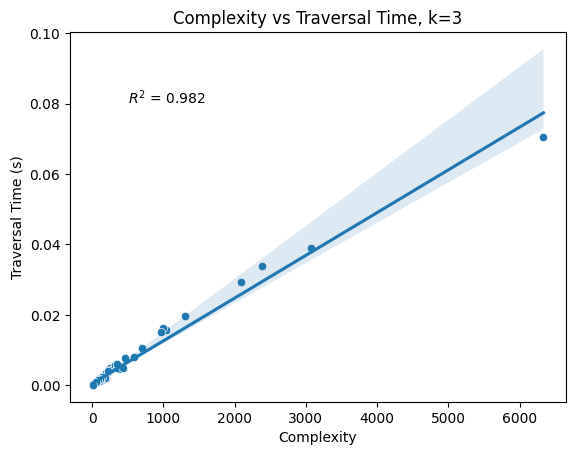

In [119]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_k3["Complexity"], df_k3["Traversal"])

ax = sns.scatterplot(data=df_k3, x="Complexity", y="Traversal")
plt = sns.regplot(data=df_k3, x="Complexity", y="Traversal", scatter=False, ax=ax)
ax.set_title("Complexity vs Traversal Time, k=3")
ax.set_ylabel("Traversal Time (s)")
plt.text(500, .08, "$R^2$ = "+str(round(r_value**2, 3)))

Text(500, 0.7, '$R^2$ = 0.99')

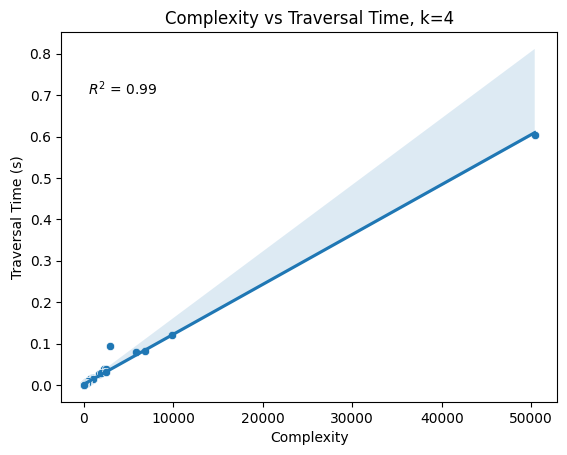

In [120]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_k4["Complexity"], df_k4["Traversal"])

ax = sns.scatterplot(data=df_k4, x="Complexity", y="Traversal")
plt = sns.regplot(data=df_k4, x="Complexity", y="Traversal", scatter=False, ax=ax)
ax.set_title("Complexity vs Traversal Time, k=4")
ax.set_ylabel("Traversal Time (s)")
plt.text(500, .7, "$R^2$ = "+str(round(r_value**2, 3)))

Text(25000, 5, '$R^2$ = 0.995')

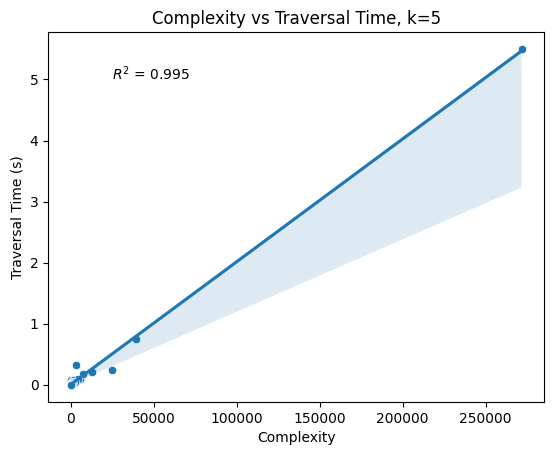

In [121]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_k5["Complexity"], df_k5["Traversal"])

ax = sns.scatterplot(data=df_k5, x="Complexity", y="Traversal")
plt = sns.regplot(data=df_k5, x="Complexity", y="Traversal", scatter=False, ax=ax)
ax.set_title("Complexity vs Traversal Time, k=5")
ax.set_ylabel("Traversal Time (s)")
plt.text(25000, 5, "$R^2$ = "+str(round(r_value**2, 3)))

Text(50000, 8, '$R^2$ = 0.218')

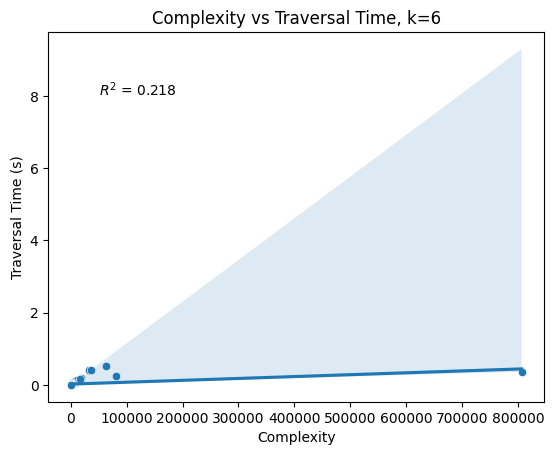

In [122]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_k6["Complexity"], df_k6["Traversal"])

ax = sns.scatterplot(data=df_k6, x="Complexity", y="Traversal")
plt = sns.regplot(data=df_k6, x="Complexity", y="Traversal", scatter=False, ax=ax)
ax.set_title("Complexity vs Traversal Time, k=6")
ax.set_ylabel("Traversal Time (s)")
plt.text(50000, 8, "$R^2$ = "+str(round(r_value**2, 3)))

Text(50000, 13, '$R^2$ = 0.152')

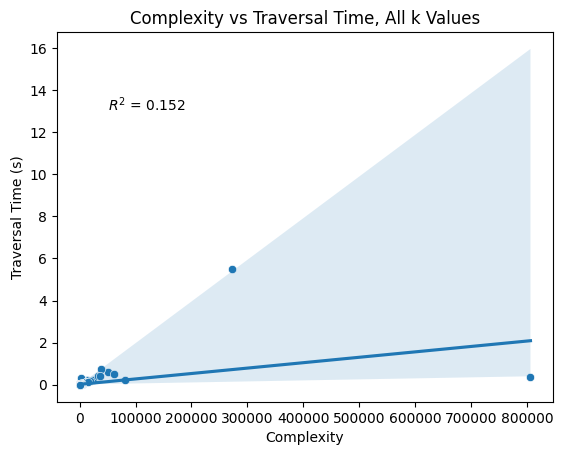

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_merged["Complexity"], df_merged["Traversal"])

ax = sns.scatterplot(data=df_merged, x="Complexity", y="Traversal")
plt = sns.regplot(data=df_merged, x="Complexity", y="Traversal", scatter=False, ax=ax)
ax.set_title("Complexity vs Traversal Time, All k Values")
ax.set_ylabel("Traversal Time (s)")
plt.text(50000, 13, "$R^2$ = "+str(round(r_value**2, 3)))

Text(5000, 1, '$R^2$ = 0.695')

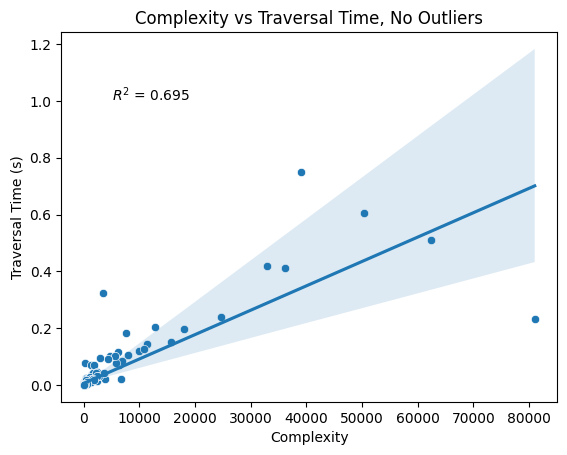

In [130]:
df_no_outliers = df_merged[df_merged["Complexity"]<100000]
slope, intercept, r_value, p_value, std_err = stats.linregress(df_no_outliers["Complexity"], df_no_outliers["Traversal"])

ax = sns.scatterplot(data=df_no_outliers, x="Complexity", y="Traversal")
plt = sns.regplot(data=df_no_outliers, x="Complexity", y="Traversal", scatter=False, ax=ax)
ax.set_title("Complexity vs Traversal Time, No Outliers")
ax.set_ylabel("Traversal Time (s)")
plt.text(5000, 1, "$R^2$ = "+str(round(r_value**2, 3)))

Text(0, 0.5, 'Index Query Count')

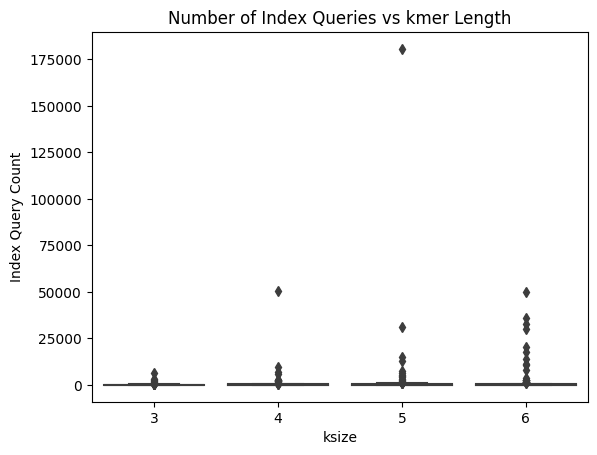

In [15]:
ax = sns.boxplot(data=df_merged, x="ksize", y="Index Queries")
ax.set_title("Number of Index Queries vs kmer Length")
ax.set_xlabel("ksize")
ax.set_ylabel("Index Query Count")